## MOBILE PRICE RANGE PREDICTION

### Problem Statement
####  In this competitive mobile phone market you cannot simply assume things. To solve this problem company collects sales data of mobile phones of various companies.Company wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. 

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [2]:
df = pd.read_csv(r'Mobile price train.csv')

In [3]:
# check top 5 rows
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#check columns names
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# check the shape of datatset
df.shape

(2000, 21)

In [6]:
# find some basic information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
# checking how many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

180


In [8]:
# checking how many observations having px_height value as 0.
print(df[df['px_height']==0].shape[0])

2


In [9]:
# As there are only 2 observations having px_height = 0 . So we will drop it.
df = df[df['px_height']!=0]

### Nearest Neightbours Imputations(KKNImputer)


In [10]:
# Replacing 0 with NaN so that we can apply KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)


In [11]:
# Import KNN imputer from sklearn
from sklearn.impute import KNNImputer
im_knn = KNNImputer(n_neighbors = 1)
df = pd.DataFrame(im_knn.fit_transform(df),columns = df.columns)

In [12]:
df.shape

(1998, 21)

In [13]:
# checking how many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

0


In [14]:
# checking data types, not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [15]:
# checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Visualising missing values')

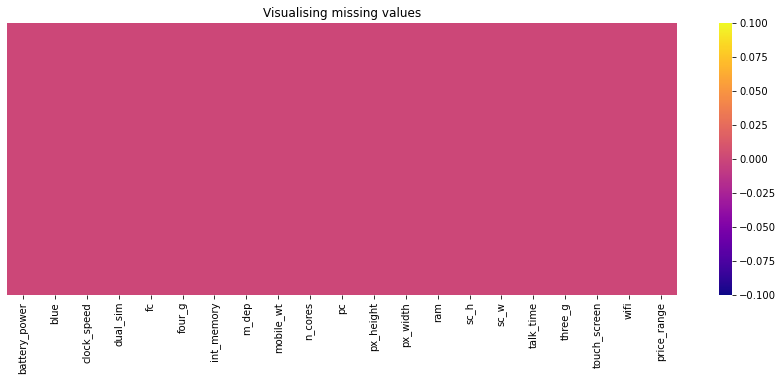

In [16]:
# visualization null values using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap = 'plasma', annot=False,yticklabels= False)
plt.title('Visualising missing values')

In [17]:
#Checking duplicates values
print('We have',df.duplicated().sum(),'duplicate values in dataset.')

We have 0 duplicate values in dataset.


### EDA(Exploratory data analysis)

In [18]:
# lets have a look on target variables.
price_range = df['price_range'].value_counts()
print(price_range)

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64


<AxesSubplot:ylabel='price_range'>

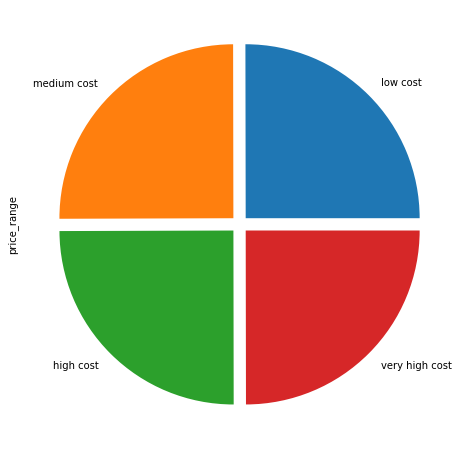

In [19]:
# Visualization on target variable
labels = ['low cost', 'medium cost', 'high cost', 'very high cost']
price_range.plot.pie(explode=[0.05]*4, labels = labels, figsize =(12,8))

<AxesSubplot:>

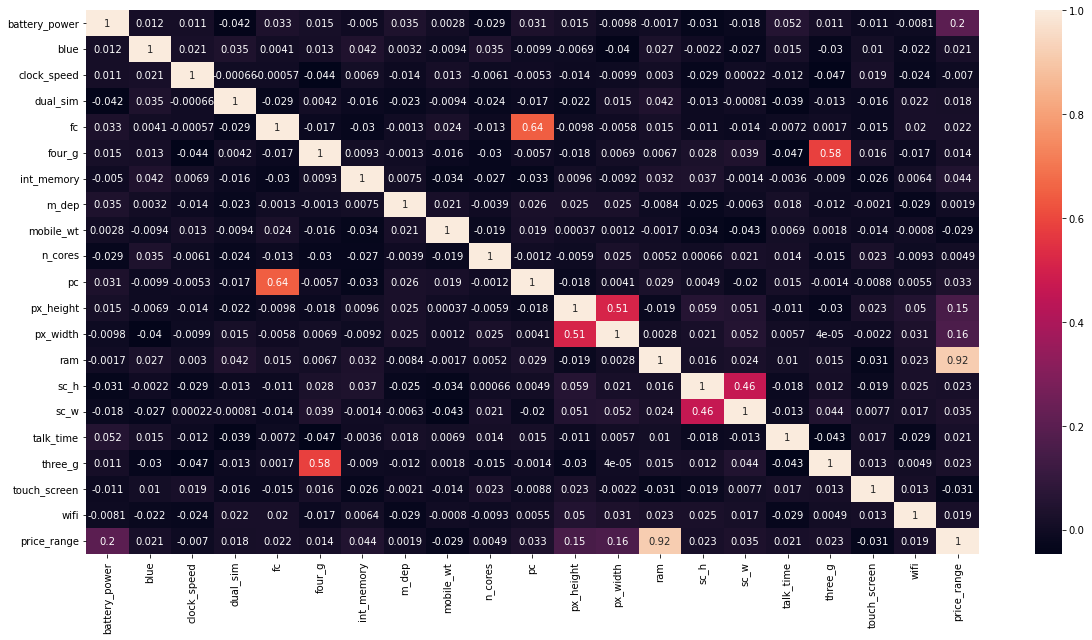

In [20]:
# Correlation of target variable
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True)

In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Univariate Analysis of Categorical columns

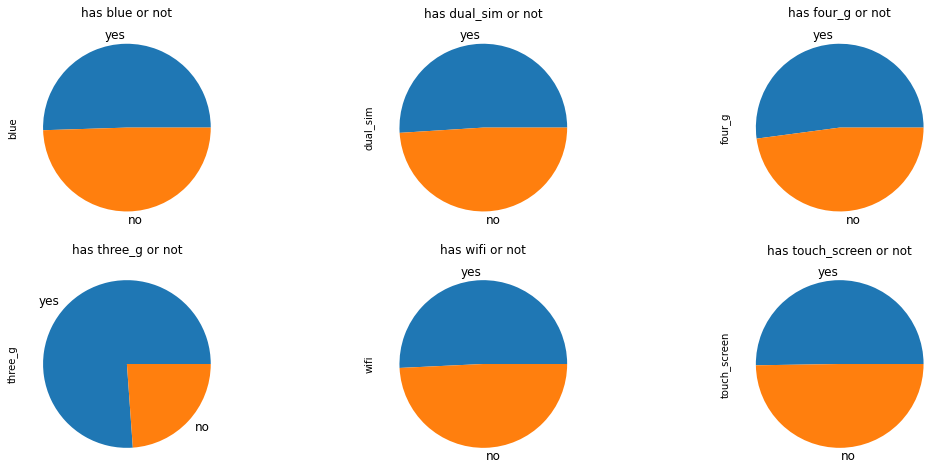

In [22]:
# Plotting the piechart for binary categorical variables
plt.figure(figsize = (15,10))
rows = 3
col = 3
count = 1
var_list = ['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels = ['yes','no']
for var in var_list:
    plt.subplot(rows,col,count)
    df[var].value_counts().plot.pie(fontsize= 12,labels = labels)
    plt.title(f'has {var} or not')
    plt.tight_layout()
    count = count+1

### Relation Between RAM,Battery_power, px_height, and px_width

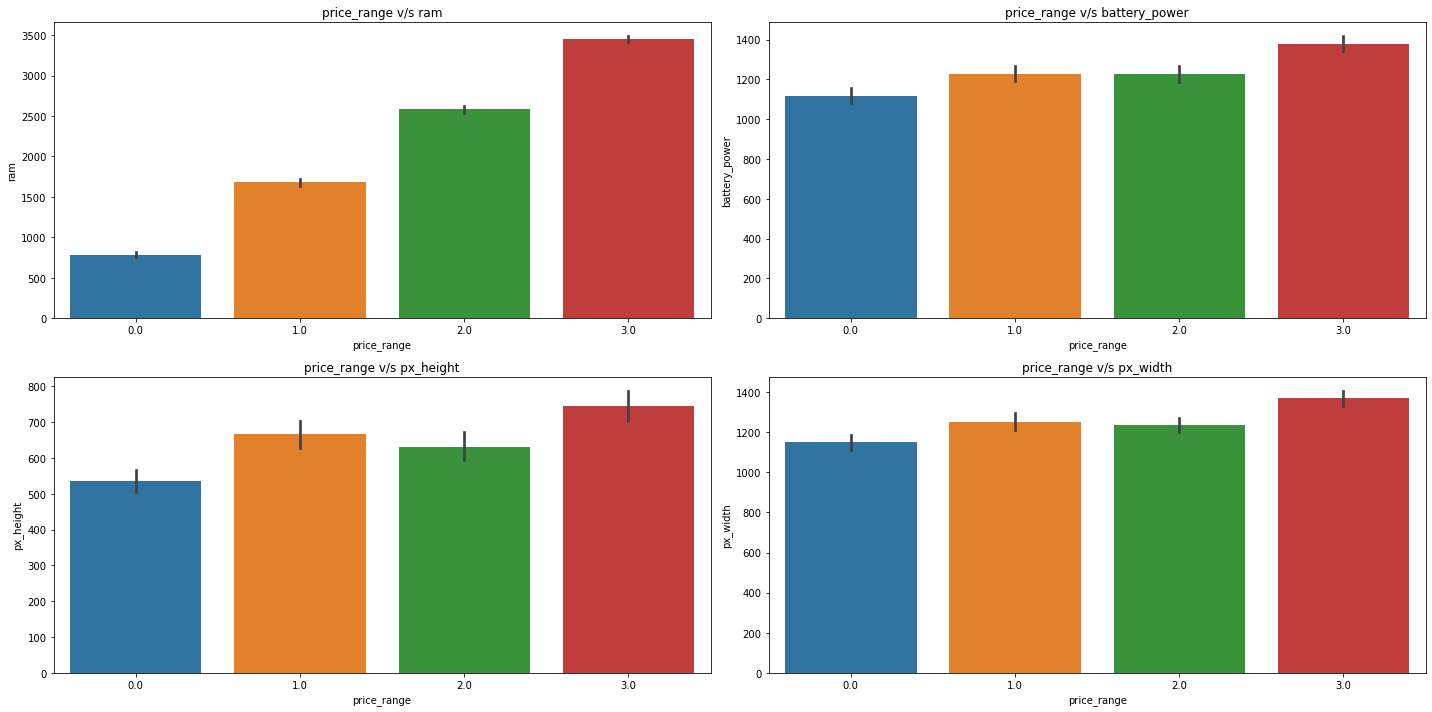

In [23]:
plt.figure(figsize = (20,10))
labels =[' 0 = low cost','1 = medium cost','2 = high cost','3 = very high cost']
rows = 2
col = 2
count = 1

variables = ['ram','battery_power','px_height','px_width']
for var in variables:
    plt.subplot(rows,col,count)
    sns.barplot(x=df['price_range'], y = df[var])
    plt.title(f'price_range v/s {var}')
    plt.tight_layout()
    count = count+1

In [24]:
num_cols = ['battery_power', 'clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram']

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


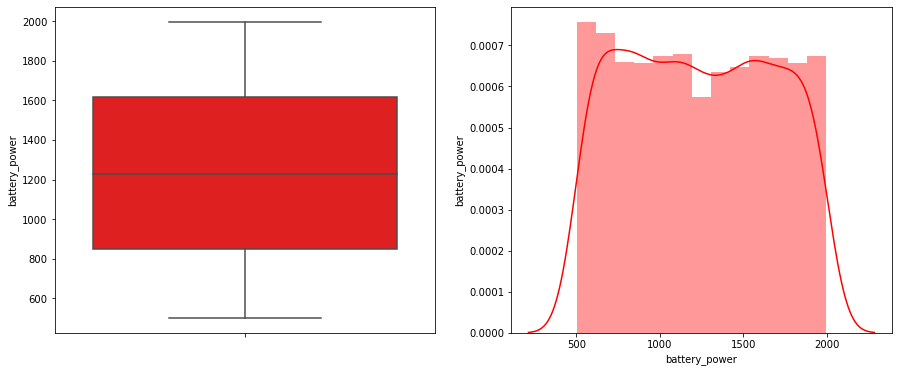

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


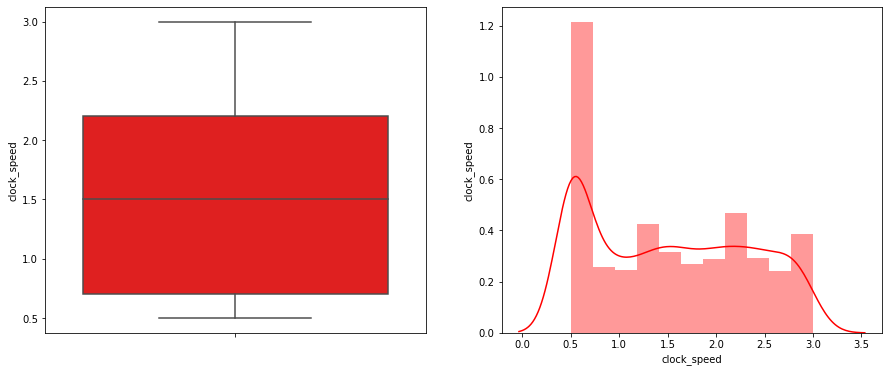

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


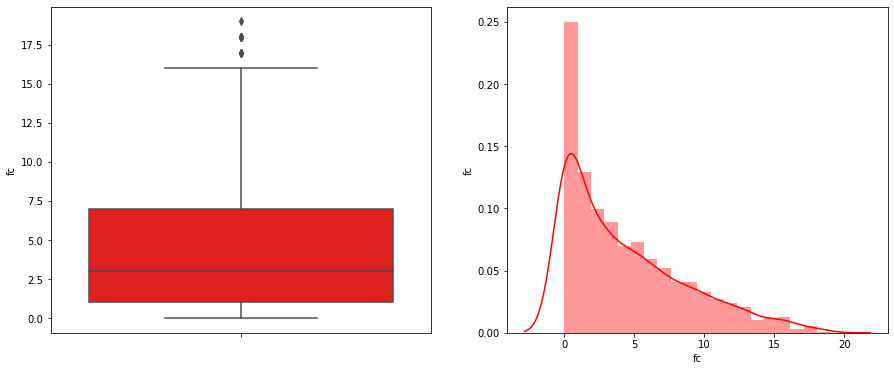

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


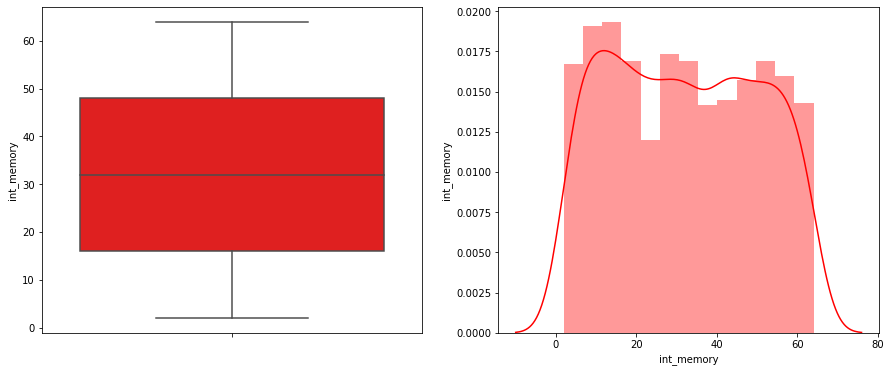

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


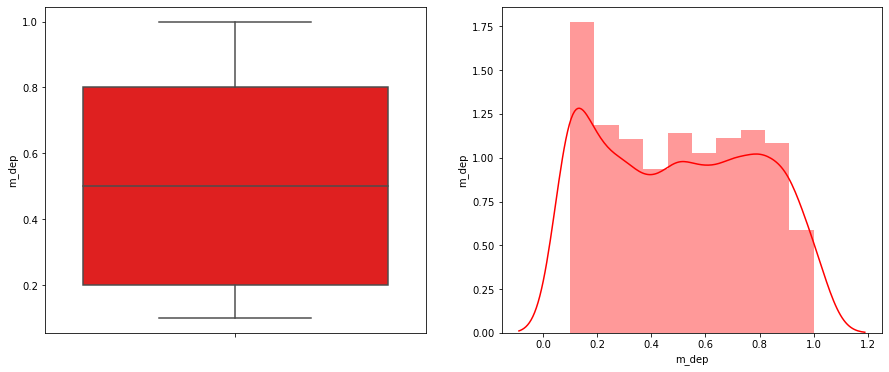

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


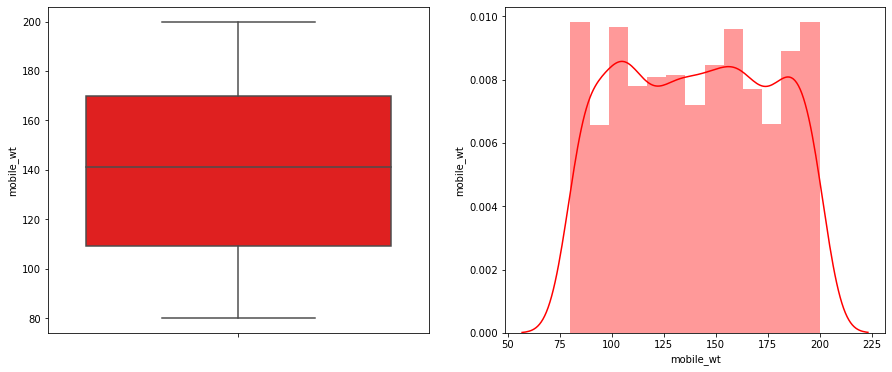

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


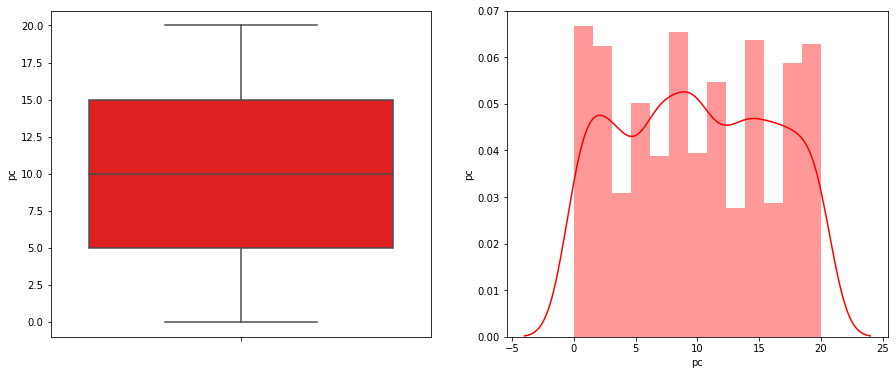

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


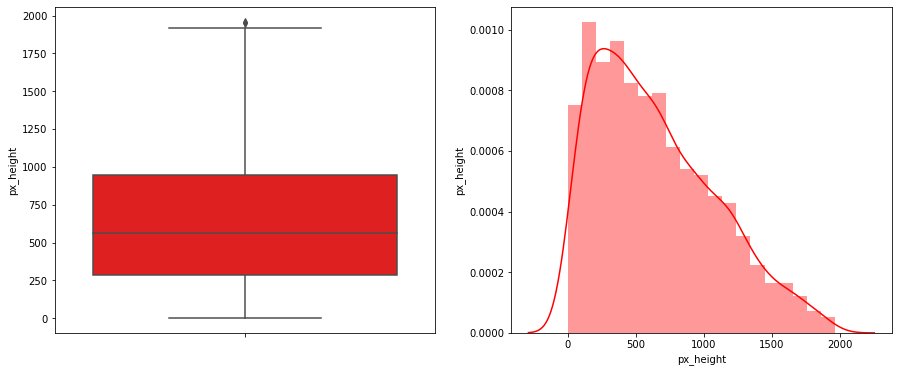

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


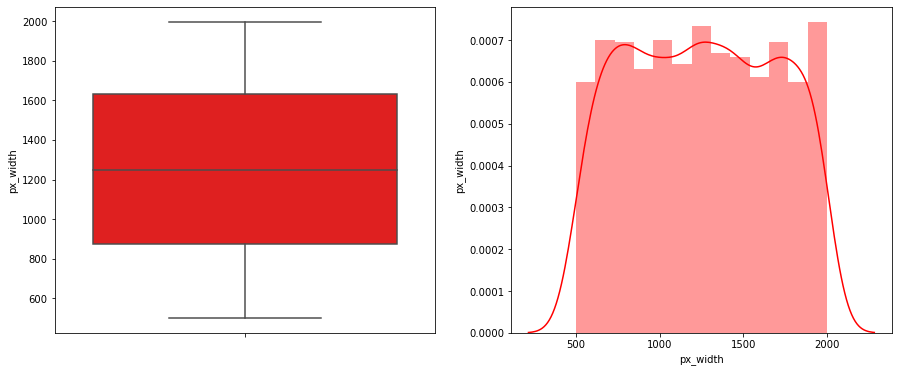

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


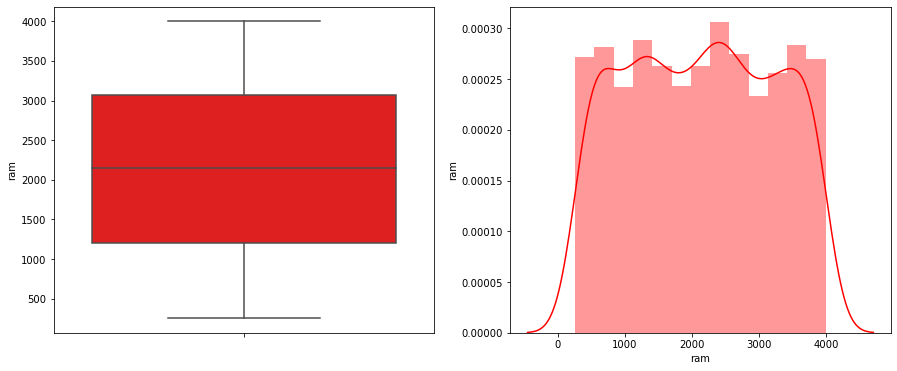

In [25]:
#plotting boxplot
for var in num_cols:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    fig = sns.boxplot(y = df[var], color = 'red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig = sns.distplot(df[var],color = 'red')
    
    fig.set_ylabel(var)
    
    plt.show()

### Outlier Treatment

In [26]:
Q1 = df['fc'].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR  = Q1-Q3

In [27]:
# Outliers are present after quartile 3, So we will take datapoints before Q3
df = df[(df['fc'] <= Q3)]

In [28]:
Q1 = df['px_height'].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR  = Q1-Q3
# Outliers are present after quartile 3, So we will take datapoints before Q3
df = df[(df['px_height'] <= Q3)]

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


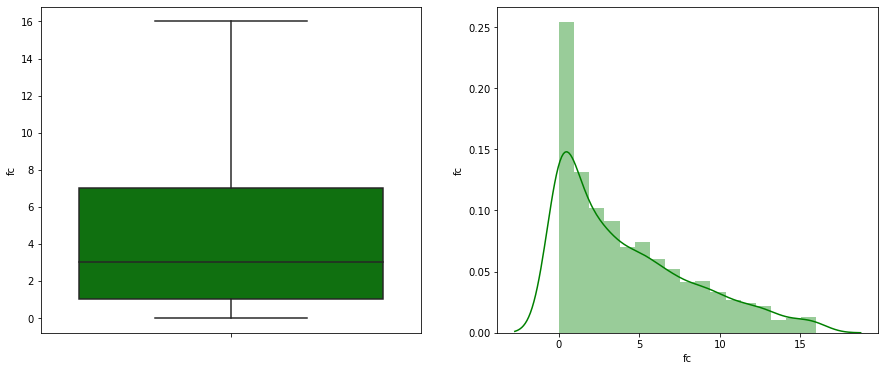

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


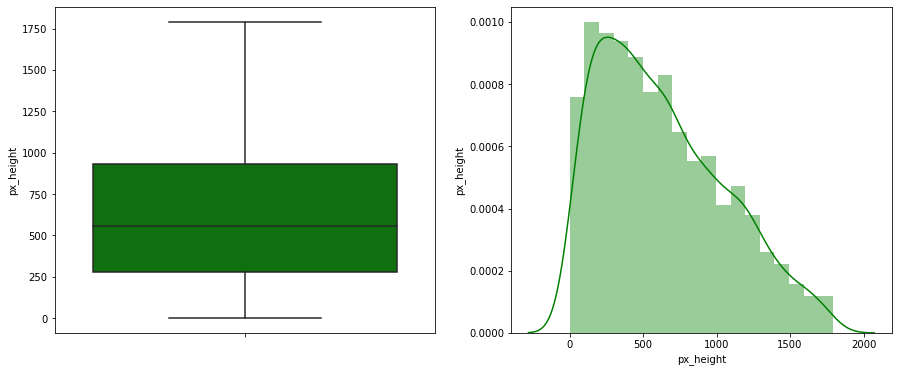

In [29]:
#visualization whether outliers are removed or not
for var in ['fc','px_height']:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    fig = sns.boxplot(y = df[var], color = 'green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig = sns.distplot(df[var],color = 'green')
    
    fig.set_ylabel(var)
    
    plt.show()

In [30]:
df.shape

(1962, 21)

In [31]:
mobile_df = df.copy()

### Feature Selection

In [32]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


In [33]:
x = df.drop('price_range',axis = 1)
y = df['price_range']

### Predicting Modeling

In [34]:
# Importing all essential libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [35]:
x_train , x_test,y_train ,y_test = train_test_split(x,y ,test_size = 0.25 , random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1471, 20)
(1471,)
(491, 20)
(491,)


In [36]:
# scaling the data
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

### 1.Decision Tree Classifier

In [37]:
model = DecisionTreeClassifier(random_state =0)


In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [39]:
pred = model.predict(x_test)

In [40]:
classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       138
         1.0       0.78      0.76      0.77       115
         2.0       0.75      0.85      0.80       119
         3.0       0.94      0.87      0.90       119

    accuracy                           0.85       491
   macro avg       0.85      0.84      0.85       491
weighted avg       0.85      0.85      0.85       491



In [41]:
accuracy_score(y_test,pred)

0.8472505091649695

In [42]:
cm = confusion_matrix(y_test,pred)
cm

array([[125,  13,   0,   0],
       [ 11,  87,  17,   0],
       [  0,  12, 101,   6],
       [  0,   0,  16, 103]], dtype=int64)

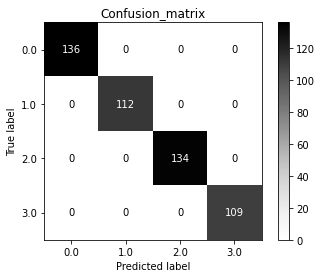

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,pred,cmap = 'Greys')
plt.grid(False)
plt.title('Confusion_matrix')
plt.show()

### 2.Random Forest Classifier

In [44]:
model1 = RandomForestClassifier(random_state = 0)
model1.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [45]:
pred1 = model1.predict(x_test)

In [46]:
pred1

array([1., 2., 2., 3., 2., 1., 0., 0., 1., 1., 3., 3., 2., 1., 0., 3., 3.,
       0., 2., 1., 0., 0., 1., 3., 1., 3., 0., 3., 2., 0., 1., 3., 3., 0.,
       0., 2., 1., 3., 1., 1., 0., 1., 2., 2., 0., 2., 1., 2., 1., 3., 3.,
       2., 3., 1., 1., 0., 0., 0., 3., 2., 3., 0., 3., 3., 2., 2., 3., 3.,
       1., 0., 0., 2., 2., 0., 2., 1., 0., 0., 2., 2., 0., 1., 3., 3., 3.,
       2., 0., 3., 3., 0., 3., 0., 1., 3., 3., 2., 2., 0., 1., 3., 2., 1.,
       0., 3., 1., 0., 1., 0., 1., 3., 0., 0., 2., 0., 2., 1., 2., 2., 1.,
       0., 0., 1., 1., 1., 1., 2., 3., 2., 2., 1., 3., 2., 0., 0., 0., 3.,
       1., 0., 0., 1., 1., 1., 2., 3., 0., 1., 0., 0., 2., 1., 1., 2., 0.,
       0., 1., 0., 2., 0., 1., 2., 3., 2., 2., 3., 2., 3., 2., 1., 3., 0.,
       2., 3., 0., 0., 3., 2., 3., 1., 2., 0., 2., 2., 3., 3., 1., 1., 0.,
       1., 2., 0., 1., 1., 0., 3., 2., 1., 1., 3., 3., 3., 2., 1., 3., 2.,
       1., 3., 0., 3., 2., 1., 2., 1., 0., 1., 0., 3., 3., 3., 0., 0., 0.,
       0., 0., 0., 1., 1.

In [47]:
cm = confusion_matrix(y_test,pred1)
cm

array([[130,   8,   0,   0],
       [  9,  94,  12,   0],
       [  0,  19,  92,   8],
       [  0,   0,   9, 110]], dtype=int64)

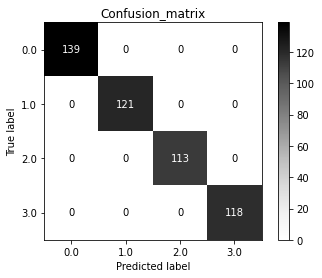

In [48]:
plot_confusion_matrix(model1,x_test,pred1,cmap = 'Greys')
plt.grid(False)
plt.title('Confusion_matrix')
plt.show()

In [49]:
classification_report(y_test,pred1)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       138
         1.0       0.78      0.82      0.80       115
         2.0       0.81      0.77      0.79       119
         3.0       0.93      0.92      0.93       119

    accuracy                           0.87       491
   macro avg       0.86      0.86      0.86       491
weighted avg       0.87      0.87      0.87       491



In [50]:
accuracy_score(y_test,pred1)

0.8676171079429735

### 3.Gradient Boosting Classifier

In [51]:
model2 = GradientBoostingClassifier(random_state = 0)

In [52]:
model2.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [53]:
pred2 = model2.predict(x_test)

In [54]:
cm = confusion_matrix(y_test, pred2)
cm

array([[131,   7,   0,   0],
       [  9,  99,   7,   0],
       [  0,  12, 102,   5],
       [  0,   0,  11, 108]], dtype=int64)

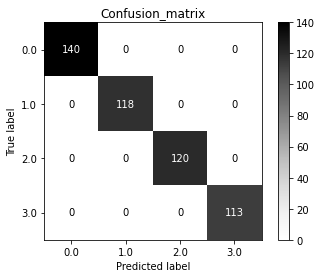

In [55]:
plot_confusion_matrix(model2,x_test,pred2,cmap = 'Greys')
plt.grid(False)
plt.title('Confusion_matrix')
plt.show()

In [56]:
classification_report(y_test,pred2)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       138
         1.0       0.84      0.86      0.85       115
         2.0       0.85      0.86      0.85       119
         3.0       0.96      0.91      0.93       119

    accuracy                           0.90       491
   macro avg       0.90      0.89      0.89       491
weighted avg       0.90      0.90      0.90       491



In [57]:
accuracy_score(y_test,pred2)

0.8961303462321792

### 4. SVM

In [58]:
from sklearn.svm import SVC

In [59]:
model3 = SVC(random_state=101)
model3.fit(x_train,y_train)

SVC(random_state=101)

In [60]:
pred3 = model3.predict(x_test)

In [61]:
cm = confusion_matrix(y_test, pred3)
cm

array([[138,   0,   0,   0],
       [  5, 108,   2,   0],
       [  0,   9, 103,   7],
       [  0,   0,   6, 113]], dtype=int64)

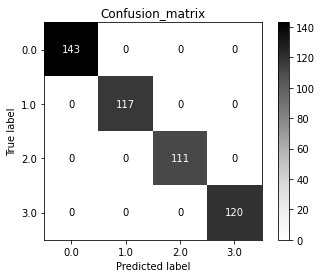

In [62]:
plot_confusion_matrix(model3,x_test,pred3,cmap = 'Greys')
plt.grid(False)
plt.title('Confusion_matrix')
plt.show()

In [63]:
classification_report(y_test,pred3)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       138
         1.0       0.92      0.94      0.93       115
         2.0       0.93      0.87      0.90       119
         3.0       0.94      0.95      0.95       119

    accuracy                           0.94       491
   macro avg       0.94      0.94      0.94       491
weighted avg       0.94      0.94      0.94       491



In [64]:
accuracy_score(y_test,pred3)

0.9409368635437881